In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
rng = np.random.default_rng()

In [2]:
# Note -- place your own MNIST files in the appropriate directory
train_data = np.loadtxt("./data/mnist/mnist_train.csv", delimiter=',')
test_data = np.loadtxt("./data/mnist/mnist_test.csv", delimiter=',')

In [3]:
train_imgs = train_data[:, 1:]  # (60000, 784)
test_imgs = test_data[:, 1:]  # (10000, 784)
train_labels = train_data[:, 0]  # (60000, )
test_labels = test_data[:, 0]  # (10000, )

In [4]:
# Change the top k input values to 1, rest of the values to 0
def k_cap(input, cap_size):
    output = np.zeros_like(input)
    if len(input.shape) == 1:
        idx = np.argsort(input)[-cap_size:]
        output[idx] = 1
    else:
        idx = np.argsort(input, axis=-1)[:, -cap_size:]
        np.put_along_axis(output, idx, 1, axis=-1)
    return output

# Parameterization of heterogeneity
## Approaches
1. Power law
2. Multimodal 
3. Multimodal power law

## Souces
1. https://www.researchgate.net/profile/Edward-Bullmore/publication/49655628_Brain_Graphs_Graphical_Models_of_the_Human_Brain_Connectome/links/0deec51fa693d09a38000000/Brain-Graphs-Graphical-Models-of-the-Human-Brain-Connectome.pdf
2.  https://www.nature.com/articles/srep27249



# Parameterization of disorder 


1. Smallworld Beta

In [4]:
n_in = 784
n_neurons = 2000
cap_size = 200
sparsity = 0.1
n_rounds = 5
beta = 1e0

In [6]:
import networkx as nx
mask = np.zeros((n_neurons, n_neurons), dtype=bool)
W = np.zeros((n_neurons, n_neurons))
mask = (rng.random((n_neurons, n_neurons)) < sparsity) & np.logical_not(np.eye(n_neurons, dtype=bool))

nx_graph = nx.from_numpy_matrix(mask)
omega = nx.algorithms.smallworld.omega(nx_graph)
print(omega)

In [ ]:
sigma = nx.algorithms.smallworld.sigma(nx_graph)
print(sigma)

In [5]:
!pip install smallworld
!pip3 install smallworld

## Generate Random Graphs and Plot Degree Distribution

### Smallworld canonical example

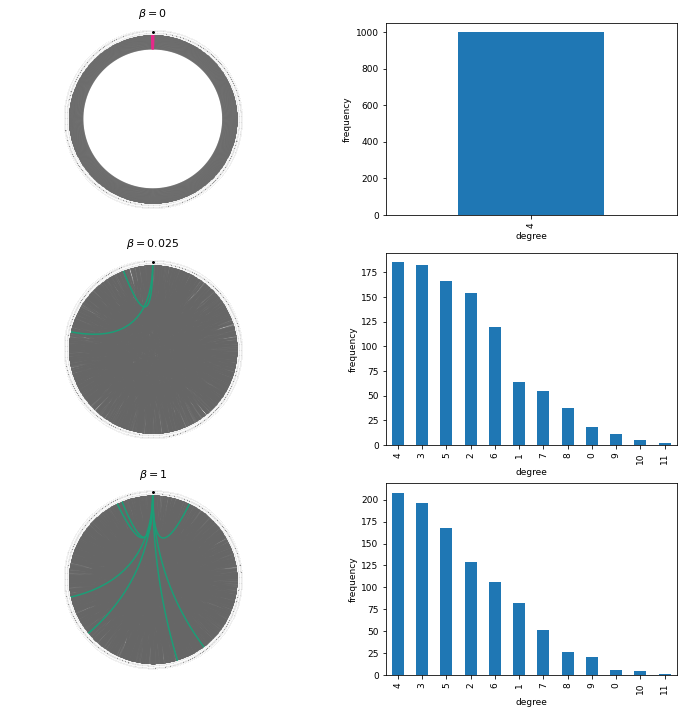

In [31]:
import smallworld

import matplotlib.pyplot as plt

import smallworld.smallworld as sm

from smallworld.smallworld.draw import draw_network

import networkx as nx

import pandas as pd

# define network parameters
N = 1000
k_over_2 = 2
betas = [0, 0.025, 1.0]
labels = [ r'$\beta=0$', r'$\beta=0.025$', r'$\beta=1$']

focal_node = 0

fig, ax = plt.subplots(3,2,figsize=(12,12))


# scan beta values
for ib, beta in enumerate(betas):

    # generate small-world graphs and draw
    G = sm.get_smallworld_graph(N, k_over_2, beta)
    draw_network(G,k_over_2,focal_node=focal_node,ax=ax[ib, 0])

    ax[ib, 0].set_title(labels[ib],fontsize=11)
    
    all_degrees = [ v for _, v in nx.degree(G) ]
    unique_degrees = sorted(set(all_degrees))

    df = pd.DataFrame({'degrees': list(all_degrees)})
    degs = df['degrees'].value_counts()
    degs.plot(ax=ax[ib, 1], kind='bar', xlabel='degree', ylabel='frequency')

# show
plt.subplots_adjust(wspace=0.3)
plt.show()

### Playing around with beta distribution and plots

[ 243.  510.  270. ...  101.   88. 1929.]


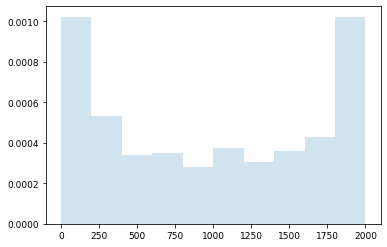

In [7]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
samples = beta.rvs(0.5, 0.5, size=n_neurons)
samples_transformed = (samples*n_neurons).round()
ax.hist(samples_transformed, density=True, histtype='stepfilled', alpha=0.2)

print(samples_transformed)

### Customized heterogenaity/order example

Gamma is the order/chaos parameter. Gamma is the chance you use a new random seed for finding random connections for a given node.\
a1, b1, a2, b2 are parameters for 2 beta distributions used for generating connections to far and near nodes respectively. \
The beta distribution was chosen because it can approximate zipf distributions, binomials, and bimodal distributions. \

Iteration 0
0.5 0.5 0.5 0.5
[831, 719, 626, 615, 569, 767, 583, 358, 412, 460, 538, 516, 242, 540, 581, 551, 818, 768, 195, 308, 750, 316, 358, 398, 374, 526, 796, 408, 723, 276, 651, 237, 676, 690, 613, 340, 448, 543, 400, 554, 750, 792, 726, 327, 525, 657, 664, 700, 221, 296, 782, 347, 735, 269, 701, 666, 747, 466, 572, 631, 485, 692, 355, 638, 572, 736, 584, 184, 431, 520, 550, 699, 560, 423, 362, 716, 237, 404, 583, 269, 669, 369, 725, 650, 406, 769, 247, 563, 643, 716, 728, 677, 782, 413, 783, 281, 539, 592, 671, 441, 671, 515, 689, 735, 718, 807, 830, 727, 784, 530, 276, 255, 304, 676, 383, 735, 355, 535, 314, 716, 322, 278, 309, 608, 618, 309, 371, 365, 566, 306, 581, 267, 216, 283, 676, 571, 673, 308, 233, 665, 182, 597, 271, 513, 651, 250, 545, 384, 273, 516, 320, 218, 629, 306, 298, 410, 539, 560, 730, 426, 226, 552, 557, 189, 310, 465, 314, 373, 408, 698, 785, 735, 489, 679, 708, 383, 432, 551, 710, 733, 264, 700, 669, 484, 675, 525, 269, 233, 355, 286, 620, 673, 827, 354, 2

[109, 219, 663, 689, 379, 383, 25, 419, 429, 768, 1118, 527, 1039, 890, 450, 379, 680, 880, 350, 192, 726, 580, 180, 631, 634, 301, 192, 1031, 487, 312, 872, 193, 337, 867, 59, 484, 432, 837, 508, 405, 388, 937, 152, 373, 865, 532, 333, 764, 812, 538, 812, 344, 790, 472, 324, 400, 381, 415, 260, 170, 251, 290, 504, 731, 558, 33, 271, 518, 619, 184, 154, 581, 503, 1098, 194, 514, 568, 89, 620, 436, 465, 285, 728, 190, 594, 83, 438, 425, 840, 1136, 694, 642, 135, 646, 893, 615, 465, 328, 534, 495, 46, 194, 510, 895, 726, 340, 843, 718, 345, 539, 394, 482, 654, 56, 556, 1069, 283, 127, 563, 274, 314, 166, 234, 272, 1014, 518, 569, 561, 376, 81, 753, 586, 307, 174, 638, 562, 243, 60, 634, 77, 553, 963, 590, 229, 389, 679, 419, 859, 557, 408, 577, 1026, 278, 98, 659, 406, 455, 217, 90, 770, 1229, 370, 546, 183, 301, 483, 425, 636, 453, 394, 821, 424, 25, 202, 872, 244, 855, 970, 525, 429, 275, 1064, 386, 150, 456, 909, 437, 290, 121, 219, 370, 473, 721, 703, 910, 480, 407, 690, 569, 186, 34

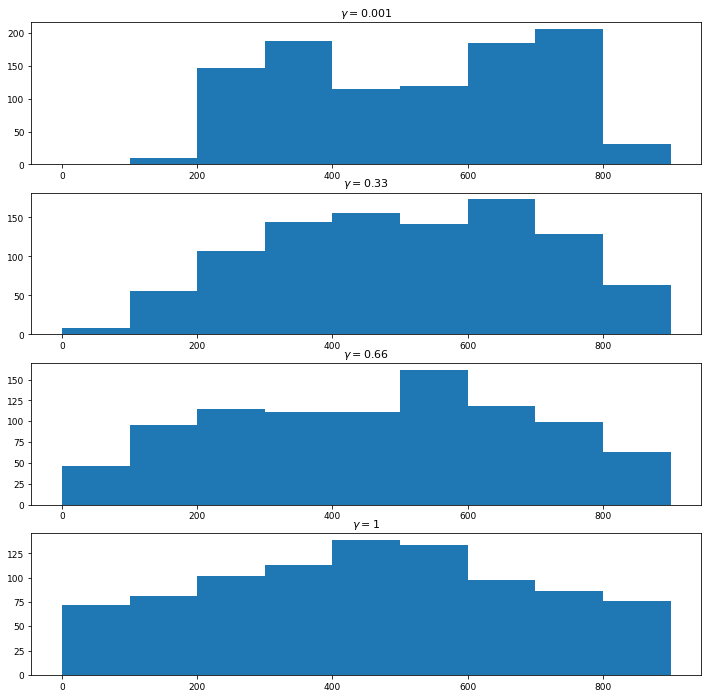

In [3]:
import smallworld

import matplotlib.pyplot as plt

import smallworld.smallworld as sm

from smallworld.smallworld.draw import draw_network

import networkx as nx

import pandas as pd

# define network parameters
N = 1000
k_over_2 = 2
betas = [0.05, 0.33, 0.66, 0.95]
labels = [ r'$\gamma=0.001$', r'$\gamma=0.33$', r'$\gamma=0.66$', r'$\gamma=1$']

focal_node = 0

fig, ax = plt.subplots(4,figsize=(12,12))


# scan beta values
for ib, beta_param_1 in enumerate(betas):
    print(f'Iteration {ib}')
    
    # generate small-world graphs and draw
    G = sm.get_smallworld_graph(N, k_over_2, beta_param_1, use_slow_algorithm=True, use_beta_distribution=True, a1=0.5, a2=0.5, b1=0.5, b2=0.5)
    # draw_network(G,k_over_2,focal_node=focal_node,ax=ax[ib, 0])

    ax[ib].set_title(labels[ib],fontsize=11)
    all_degrees = [ v for _, v in nx.degree(G) ]
#     unique_degrees = sorted(set(all_degrees))
#     df = pd.DataFrame({'degrees': list(all_degrees)})
#     degs = df['degrees'].value_counts()
#     degs.plot(ax=ax[ib, 1], kind='bar', xlabel='degree', ylabel='frequency')
    print(all_degrees)
    ax[ib].hist(all_degrees, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

    print()

# show
plt.subplots_adjust(wspace=0.3)
plt.show()

In [1]:


mask_a = np.zeros((n_in, n_neurons), dtype=bool)
A = np.zeros((n_in, n_neurons))

# Random mask on inter-area connections
# Choose 10% of connections and not the diagnal

W = np.ones((n_neurons, n_neurons)) * mask
W /= W.sum(axis=0)

# Random mask on input-learning area connections
mask_a = rng.random((n_in, n_neurons)) < sparsity
A = np.ones((n_in, n_neurons)) * mask_a
A /= A.sum(axis=0)

NameError: name 'np' is not defined

In [6]:
from scipy.signal import convolve
# k-cap on convolved input pixels
n_examples = 5000
examples = np.zeros((10, n_examples, 784))
for i in range(10):
    examples[i] = k_cap(convolve(train_imgs[train_labels == i][:n_examples].reshape(-1, 28, 28), np.ones((1, 3, 3)), mode='same').reshape(-1, 28 * 28), cap_size)

In [9]:
# Init connections from each neuron to sum up to 1
W = np.ones_like(W) * mask
A = np.ones_like(A) * mask_a
W /= W.sum(axis=0, keepdims=True)
A /= A.sum(axis=0, keepdims=True)
bias = np.zeros(n_neurons)
b = -1
activations = np.zeros((10, n_rounds, n_neurons))

# Loop over each class
for i in range(10):
    act_h = np.zeros(n_neurons)
    
    # Loop over several examples
    for j in range(n_rounds):
        input = examples[i, j]
        
        # calculate activation
        act_h_new = k_cap(act_h @ W + input @ A + bias, cap_size)
        activations[i, j] = act_h_new.copy()
        
        # update weights
        A[(input > 0)[:, np.newaxis] & (act_h_new > 0)[np.newaxis, :]] *= 1 + beta
        W[(act_h > 0)[:, np.newaxis] & (act_h_new > 0)[np.newaxis, :]] *= 1 + beta
        
        act_h = act_h_new
        
    bias[act_h > 0] += b
    A /= A.sum(axis=0, keepdims=True)
    W /= W.sum(axis=0, keepdims=True)

In [10]:
outputs = np.zeros((10, n_rounds+1, n_examples, n_neurons))
for i in np.arange(10):
    # Run each example through the model n_round times
    for j in range(n_rounds):
        outputs[i, j+1] = k_cap(outputs[i, j] @ W + examples[i] @ A, cap_size)

In [11]:
outputs.shape

(10, 6, 5000, 2000)

In [12]:
idx = np.full(n_neurons, -1, dtype=int)
act = activations[:, -1].copy()       # final state activation after training each class
act.shape

(10, 2000)

In [13]:
for i, j in enumerate(range(10)):
    idx[i*cap_size:(i+1)*cap_size] = act[j].argsort()[-cap_size:][::-1]
    act[:, idx[i*cap_size:(i+1)*cap_size]] = -1
    
r = np.arange(n_neurons)
r[idx[idx > -1]] = -1
idx[(i+1)*cap_size:] = np.unique(r)[1:]

In [23]:
get_ipython().run_line_magic('matplotlib', 'inline')

/var/folders/hl/hphwgcmj5klg4y0m96np3mdm0000gn/T/ipykernel_36310/1153447249.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


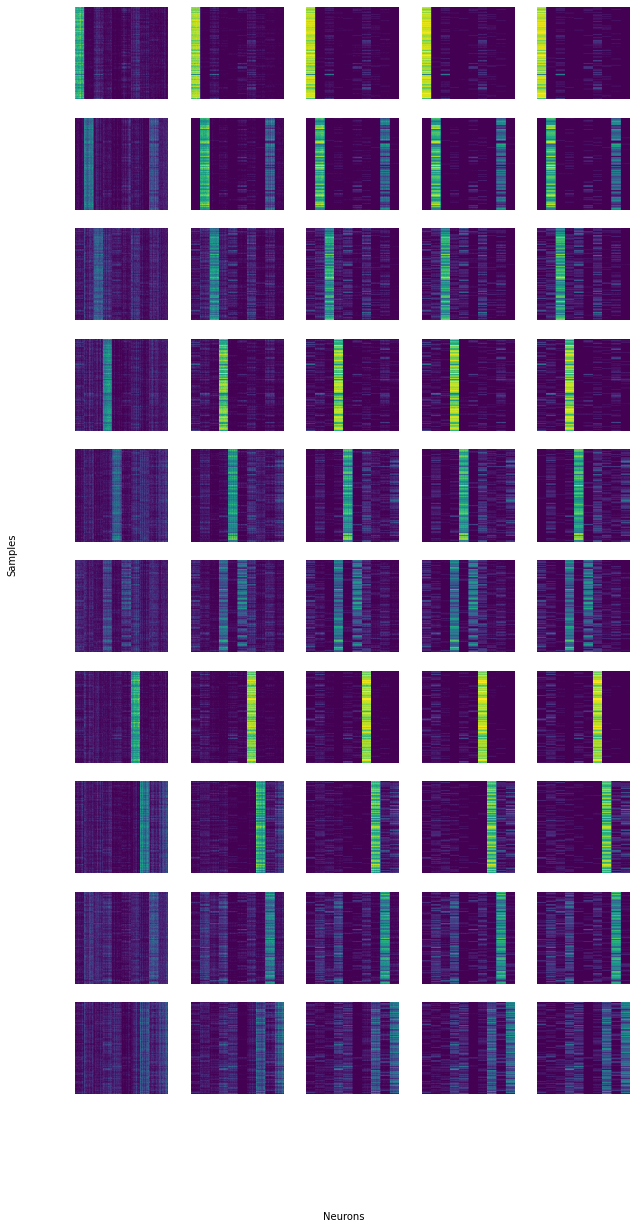

In [24]:
#%%
fig, axes = plt.subplots(10, n_rounds, figsize=(10, 2 * 10), sharex=True, sharey=True)
for ax, output in zip(axes, outputs):
    for i in range(n_rounds):
        ax[i].imshow((output[i+1] > 0)[:n_neurons, idx])
        ax[i].set_axis_off()
fig.text(0.5, 0.04, 'Neurons', ha='center', va='center')
fig.text(0.04, 0.5, 'Samples', ha='center', va='center', rotation='vertical')
fig.show()


In [25]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)

In [26]:
v = 0.1 * rng.standard_normal((10, n_neurons))
targets = np.zeros((100, 10))

for i in range(10):
    targets[i*10:(i+1)*10, i] = 1
update = np.zeros_like(v)

In [27]:
for z in range(10):
    permutation = rng.permutation(n_examples - 1000)
    print(f'{z}th iteration')
    for j in range((n_examples - 1000) // 10):
        batch = outputs[:, 1, permutation[j*10:(j+1)*10]].reshape(10 * 10, n_neurons)
        scores = softmax((batch[:, :, np.newaxis] * v.T[np.newaxis, :, :]).sum(axis=1))
        update = 0.5 * update + 1e-3 * (batch[:, np.newaxis, :] * (scores - targets)[:, :, np.newaxis]).sum(axis=0)
        v -= update

0th iteration
1th iteration
2th iteration
3th iteration
4th iteration
5th iteration
6th iteration
7th iteration
8th iteration
9th iteration
10th iteration
11th iteration
12th iteration
13th iteration
14th iteration
15th iteration
16th iteration
17th iteration
18th iteration
19th iteration
20th iteration
21th iteration
22th iteration
23th iteration
24th iteration
25th iteration
26th iteration
27th iteration
28th iteration
29th iteration
30th iteration
31th iteration
32th iteration
33th iteration
34th iteration
35th iteration
36th iteration
37th iteration
38th iteration
39th iteration
40th iteration
41th iteration
42th iteration
43th iteration
44th iteration
45th iteration
46th iteration
47th iteration
48th iteration
49th iteration
50th iteration
51th iteration
52th iteration
53th iteration
54th iteration
55th iteration
56th iteration
57th iteration
58th iteration
59th iteration
60th iteration
61th iteration
62th iteration
63th iteration
64th iteration
65th iteration
66th iteration
67th 

In [28]:
((outputs[:, 1, :-1000] @ v.T).argmax(axis=-1) == np.arange(10)[:, np.newaxis]).sum() / 40000

0.998775

In [29]:
((outputs[:, 1, -1000:] @ v.T).argmax(axis=-1) == np.arange(10)[:, np.newaxis]).sum() / 10000

0.9258

Text(0, 0.5, 'Firing Probability')

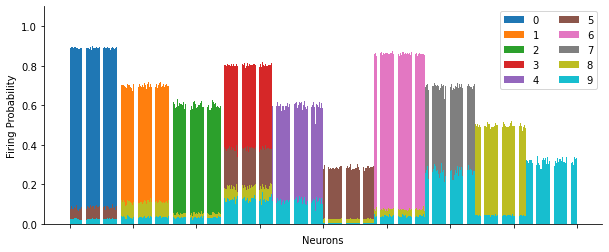

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(10):
    # Pass each sample to the model and get its result 
    ax.bar(np.arange(n_neurons), outputs[i, -1].mean(axis=0)[idx], label=i)
ax.legend(loc='upper right', ncol=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0, 1.1])
ax.set_xticklabels([])
ax.set_xlabel('Neurons')
ax.set_ylabel('Firing Probability')
fig.show()

In [31]:
# c is a mask for identifying each assembly
# set top k neurons to value 1 and 0 otherwise 
c = np.zeros((10, n_neurons))
use_train_act = True

for i in range(10):
    
    if use_train_act:
        # create mask based on the last activation of each class during training
        c[i, activations[i, -1].argsort()[-cap_size:]] = 1
    else:
        # create mask based on the activation after 1 round of ALL the samples for each class
        c[i, outputs[i, 1].sum(axis=0).argsort()[-cap_size:]] = 1
        
predictions = (outputs[:, 1] @ c.T).argmax(axis=-1)
acc = (predictions == np.arange(10)[:, np.newaxis]).sum(axis=-1) / n_examples

In [32]:
acc, acc.mean()

(array([0.8892, 0.692 , 0.604 , 0.8058, 0.5886, 0.2742, 0.8624, 0.69  ,
        0.4922, 0.3454]),
 0.62438)

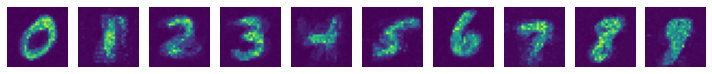

In [33]:
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
    axes[i].imshow((A * c[i][np.newaxis, :]).sum(axis=1).reshape(28, 28))
    axes[i].set_axis_off()
fig.tight_layout()